In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from pickle import dump
from pickle import load
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('BankNote_Authentication.csv')

In [ ]:
df.shape

(1372, 5)

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


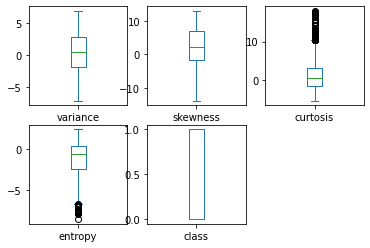

In [ ]:
df.plot(kind='box',subplots=True,layout=(2,3),sharex=False,sharey=False)
pyplot.show()

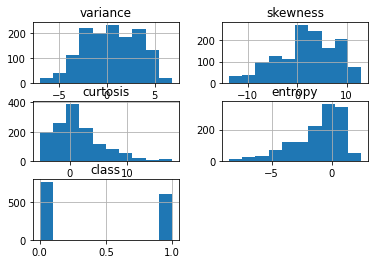

In [ ]:
df.hist()
pyplot.show()
#class 0 is authentic 1 is not authentic

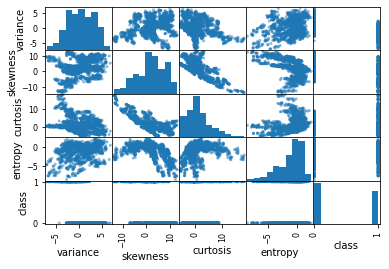

In [ ]:
scatter_matrix(df)
pyplot.show()

In [ ]:
#standardizing the dataset
array = df.values

X = array[:,0:4] #first 4 columns
Y = array[:,4] #class

scaler = StandardScaler().fit(X) #fit x in scalar

rescaledX= scaler.fit_transform(X) 
set_printoptions(precision=4) #upto 3 decimal values
print(rescaledX[0:5,:])


[[ 1.1218  1.1495 -0.976   0.3546]
 [ 1.4471  1.0645 -0.895  -0.1288]
 [ 1.2078 -0.7774  0.1222  0.6181]
 [ 1.0637  1.2955 -1.2554 -1.144 ]
 [-0.0368 -1.087   0.7367  0.0966]]


In [ ]:
#evaluate some algorithms
validation_size=0.20 #20% validation 80% test
seed = 7
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)
print(X_train.shape)
print(X_validation.shape)
Y

(1097, 4)
(275, 4)


array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
#compare machine learning algorithms to check accuracy of each algo
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results = []
names = []
for name,model in models:
  kfold=KFold(n_splits=10,random_state=seed,shuffle=True)
  cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
  names.append(name)
  results.append(cv_results)
  msg = "%s = %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

LR = 0.991802 (0.004899)
LDA = 0.976330 (0.015849)
CART = 0.980826 (0.011200)
NB = 0.843186 (0.027513)
SVM = 0.995455 (0.007329)


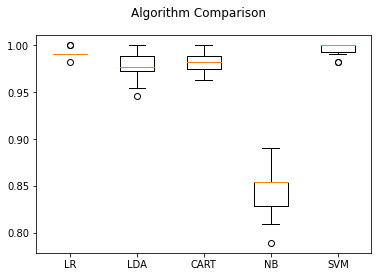

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
#make predictions on validation dataset
LR = LogisticRegression()
LR.fit(X_train,Y_train)
predictions = LR.predict(X_validation)
print("Accuray score",accuracy_score(Y_validation,predictions))
print("Confusion Matrix",confusion_matrix(Y_validation,predictions)) #TP FP
print("Classification report:",classification_report(Y_validation,predictions))

Accuray score 0.9854545454545455
Confusion Matrix [[154   4]
 [  0 117]]
Classification report:               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       158
         1.0       0.97      1.00      0.98       117

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
df.iloc[0].values[:-1].shape

(4,)

In [ ]:
X_validation[0]
X_validation[0].shape

(4,)

In [ ]:
X_validation[5]

array([-2.0285,  3.8468, -0.6343, -1.175 ])

In [ ]:
Y_validation[5]

1.0

In [ ]:
print(df.iloc[0].values[:-1].reshape(-1,1).shape)
df.iloc[0].values[:-1].reshape(-1,1)

(4, 1)


array([[ 3.6216],
       [ 8.6661],
       [-2.8073],
       [-0.447 ]])

In [ ]:
SVM = SVC()
SVM.fit(X_train,Y_train)
predictions = SVM.predict(X_validation)
#Y_validation 1. 0. and predictions 0. 1. and so on
print("Accuray score",accuracy_score(Y_validation,predictions))
print("Confusion Matrix",confusion_matrix(Y_validation,predictions))
print("Classification report:",classification_report(Y_validation,predictions))

Accuray score 1.0
Confusion Matrix [[158   0]
 [  0 117]]
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       158
         1.0       1.00      1.00      1.00       117

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [ ]:
#finalizing the model with pickle
array = df.values
X = array[:,0:4] #first 4 columns
Y = array[:,4] #class
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=7)
model = SVC()
model.fit(X_train,Y_train)

filename = 'finalized_model.pkl'
dump(model,open(filename,'wb'))

loaded_model = load(open(filename,'rb'))
result = loaded_model.score(X_test,Y_test)
print("Accuracy: ",result*100)

Accuracy:  100.0


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('SVC_model.pkl','wb'))